<!-- Submitted By: Laksh Mittal
101916002
CSE9 -->

**Q1: (GridSearchCV for KNN)**

Explore about GridSearchCV toot in scikit-learn. This is a tool
that is often used for tuning hyperparameters of machine
learning models.

Use this tool to find the best value of K for K-NN Classifier
using any dataset

In [35]:
import numpy as np
import pandas as pd

In [36]:
df=pd.read_csv("Iris.csv")

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [38]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
X=df.iloc[:,:4]
print(X)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm
0      1            5.1           3.5            1.4
1      2            4.9           3.0            1.4
2      3            4.7           3.2            1.3
3      4            4.6           3.1            1.5
4      5            5.0           3.6            1.4
..   ...            ...           ...            ...
145  146            6.7           3.0            5.2
146  147            6.3           2.5            5.0
147  148            6.5           3.0            5.2
148  149            6.2           3.4            5.4
149  150            5.9           3.0            5.1

[150 rows x 4 columns]


In [40]:
Y=df.iloc[:,4]
print(Y)

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: PetalWidthCm, Length: 150, dtype: float64


In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(Y)
print(y)

[ 1  1  1  1  1  3  2  1  1  0  1  1  0  0  1  3  3  2  2  2  1  3  1  4
  1  1  3  1  1  1  1  3  0  1  0  1  1  0  1  1  2  2  1  5  3  2  1  1
  1  1 10 11 11  9 11  9 12  6  9 10  6 11  6 10  9 10 11  6 11  7 14  9
 11  8  9 10 10 13 11  6  7  6  8 12 11 12 11  9  9  9  8 10  8  6  9  8
  9  9  7  9 21 15 17 14 18 17 13 14 14 21 16 15 17 16 20 19 14 18 19 11
 19 16 16 14 17 14 14 14 17 12 15 16 18 11 10 19 20 14 14 17 20 19 15 19
 21 19 15 16 19 14]


In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler=StandardScaler()

In [44]:
X_scaled=scaler.fit_transform(X)
print(X_scaled)

[[-1.72054204 -0.90068117  1.03205722 -1.3412724 ]
 [-1.69744751 -1.14301691 -0.1249576  -1.3412724 ]
 [-1.67435299 -1.38535265  0.33784833 -1.39813811]
 [-1.65125846 -1.50652052  0.10644536 -1.2844067 ]
 [-1.62816394 -1.02184904  1.26346019 -1.3412724 ]
 [-1.60506942 -0.53717756  1.95766909 -1.17067529]
 [-1.58197489 -1.50652052  0.80065426 -1.3412724 ]
 [-1.55888037 -1.02184904  0.80065426 -1.2844067 ]
 [-1.53578584 -1.74885626 -0.35636057 -1.3412724 ]
 [-1.51269132 -1.14301691  0.10644536 -1.2844067 ]
 [-1.4895968  -0.53717756  1.49486315 -1.2844067 ]
 [-1.46650227 -1.26418478  0.80065426 -1.227541  ]
 [-1.44340775 -1.26418478 -0.1249576  -1.3412724 ]
 [-1.42031323 -1.87002413 -0.1249576  -1.51186952]
 [-1.3972187  -0.05250608  2.18907205 -1.45500381]
 [-1.37412418 -0.17367395  3.11468391 -1.2844067 ]
 [-1.35102965 -0.53717756  1.95766909 -1.39813811]
 [-1.32793513 -0.90068117  1.03205722 -1.3412724 ]
 [-1.30484061 -0.17367395  1.72626612 -1.17067529]
 [-1.28174608 -0.90068117  1.72

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=0)

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier(n_neighbors=3)

In [49]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [50]:
ypredict=knn.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
print((confusion_matrix(y_test,ypredict)))

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 4 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 5 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]]


In [53]:
from sklearn.metrics import mean_squared_error

print((classification_report(y_test,ypredict)))
print(mean_squared_error(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.33      0.50      0.40         8
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         3
           9       0.09      0.50      0.15         2
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         1
          14       0.50      0.25      0.33         4
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.mean_squared_error(y_test, y_pred))


5.333333333333333


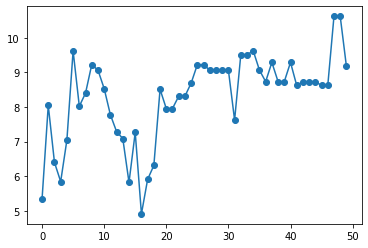

In [55]:
k_range = list(range(1, 51))
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.mean_squared_error(y_test, y_pred))
    import matplotlib.pyplot as plt
plt.plot(scores,marker='o')
plt.show()

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
k_range = list(range(1, 51))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [58]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]}


In [59]:
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
#score = make_scorer(mean_squared_error)
grid = GridSearchCV(knn, param_grid, cv=10,scoring='accuracy',return_train_score=False)
grid.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=50, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [60]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.15333333 0.24       0.26666667 0.28       0.28       0.24666667
 0.25333333 0.26666667 0.28       0.28666667 0.26       0.26
 0.25333333 0.26       0.29333333 0.30666667 0.3        0.31333333
 0.32       0.31333333 0.3        0.28666667 0.29333333 0.28666667
 0.28666667 0.29333333 0.29333333 0.3        0.3        0.30666667
 0.30666667 0.32       0.32       0.31333333 0.32       0.32
 0.32666667 0.32       0.32       0.32       0.32       0.32
 0.32       0.32666667 0.32666667 0.32666667 0.32       0.31333333
 0.31333333 0.30666667]


Text(0, 0.5, 'accuracy')

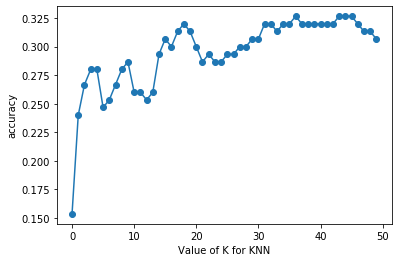

In [61]:
plt.plot(grid_mean_scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('accuracy')